In [2]:
import os
import pandas as pd
import gmaps
from connors_config import gkey
import matplotlib.pyplot as plt
import requests
import json
gmaps.configure(api_key=gkey)

In [3]:
byzip_df = pd.read_csv("byzip.csv", converters={'Provider Zip Code': lambda x: str(x)})

byzip_df = byzip_df.rename(columns={"Provider Zip Code": "Zipcode"})

locs = pd.read_csv("locs_with_gmaps.csv", converters={'Provider Zip Code': lambda x: str(x)})

correct_zips = []
for zipcode in locs["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

locs["Zipcode"] = correct_zips

locs["Zipcode"] = locs["Zipcode"].astype(int)
byzip_df["Zipcode"] = byzip_df["Zipcode"].astype(int)

summary_df = byzip_df.merge(locs)

correct_zips = []
for zipcode in summary_df["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
summary_df["Zipcode"] = correct_zips    
print(len(correct_zips))


summary_df_dropna = summary_df.dropna()

len(summary_df_dropna)


33120
2788


2785

In [4]:
censusdata = pd.read_csv("Full_ZH_Info.csv", converters={'Zipcode': lambda x: str(x)})

correct_zips = []
for zipcode in censusdata["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

censusdata["Zipcode"] = correct_zips

censusdata["Zipcode"] = censusdata["Zipcode"].astype(int)
summary_df["Zipcode"] = summary_df["Zipcode"].astype(int)

summary_df = summary_df.merge(censusdata)

summary_df

33120


,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,Unnamed: 0,Center Point Lat,Center Point Lng,ID,Gmaps Lat,...,Per Capita Income,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,1040,27.833333,8608.660833,9036.313125,-427.652292,158,42.211656,-72.642448,2.0,42.217209,...,22343.0,28.067523,6.154876,His,76.817098,HOLYOKE MEDICAL CENTER,1040,42.200300,-72.627600,1.093095
1,1060,32.237288,9171.080000,9814.069322,-642.989322,164,42.321488,-72.630588,0.0,42.325049,...,33593.0,16.173091,4.136844,White,80.064961,COOLEY DICKINSON HOSPITAL,1061,42.330200,-72.653200,1.304934
2,1069,30.200000,6768.811200,8306.754400,-1537.943200,169,42.187794,-72.308469,1.0,42.184255,...,28141.0,6.038324,4.668004,White,96.678967,BAY STATE WING MEMORIAL HOSPITAL AND MEDICAL C...,1069,42.169600,-72.341800,2.122449
3,1085,23.285714,7159.006429,8546.186071,-1387.179643,183,42.153503,-72.771602,1.0,42.131878,...,28878.0,8.800501,4.941097,White,70.982754,NOBLE HOSPITAL,1086,42.118300,-72.759600,2.506698
4,1104,39.580645,10988.196935,10548.951452,439.245484,195,42.134009,-72.565378,1.0,42.134146,...,18089.0,29.052587,6.365765,His,75.611901,VIBRA HOSPITAL OF WESTERN MASSACHUSETTS,1109,42.120518,-72.547438,1.310159
5,1199,81.017699,15600.255310,11854.850442,3745.404867,206,42.120563,-72.604468,1.0,42.120872,...,NaN,NaN,NaN,No_Pop,0.000000,BAYSTATE MEDICAL CENTER,1199,42.121700,-72.603200,0.101997
6,1201,53.634409,12745.857204,11104.683656,1641.173548,207,42.448236,-73.273727,2.0,42.463450,...,27192.0,16.418108,5.702877,White,75.745767,BERKSHIRE MEDICAL CENTER - HILLCREST CAMPUS,1201,42.458100,-73.280700,0.768495
7,1301,36.153846,8443.859231,8551.243590,-107.384359,239,42.626761,-72.601530,1.0,42.592410,...,28199.0,13.593381,3.523584,White,81.325052,BAYSTATE FRANKLIN MEDICAL CENTER,1301,42.595700,-72.592300,2.195029
8,1432,25.705882,7351.985294,8829.604118,-1477.618824,271,42.566573,-71.575135,1.0,42.560359,...,40066.0,11.897450,6.262518,White,100.000000,NASHOBA VALLEY MEDICAL CENTER,1432,42.577500,-71.573900,0.756859
9,1440,30.000000,8047.948929,8812.181071,-764.232143,275,42.584206,-71.988737,1.0,42.592464,...,23315.0,18.036417,4.763780,White,91.923602,HEYWOOD HOSPITAL,1440,42.586300,-71.987100,0.166922


In [5]:
#for x in summary_df["Difference"]:

summary_df_dropna['new'] = pd.Series([8678.906667 for x in range(len(summary_df_dropna.index))])

summary_df_dropna["Weight"] = summary_df_dropna["Difference"] + summary_df_dropna["new"]
len(summary_df_dropna)

2785

In [6]:
locations = summary_df_dropna[["Gmaps Lat", "Gmaps Lon"]]
td = summary_df_dropna["Weight"].astype(float)

print(len(summary_df_dropna))
summary_df_dropna.to_csv("messy_summary.csv")

2785


In [7]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=td, 
                                 dissipating=False, max_intensity=47262,
                                 point_radius=.6)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
correct_zips = []
for zipcode in locs["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

locs["Zipcode"] = correct_zips

locs["Gmaps Lat"] = ""
locs["Gmaps Lon"] = ""

33120


<function matplotlib.pyplot.show>

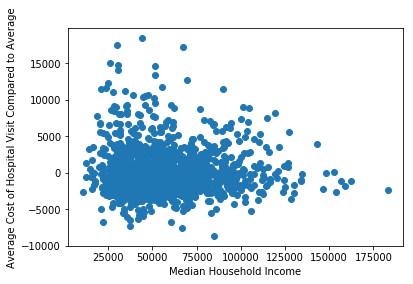

In [9]:
plt.scatter(summary_df["Household Income"], summary_df["Difference"])
plt.xlabel("Median Household Income")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")

plt.show

<function matplotlib.pyplot.show>

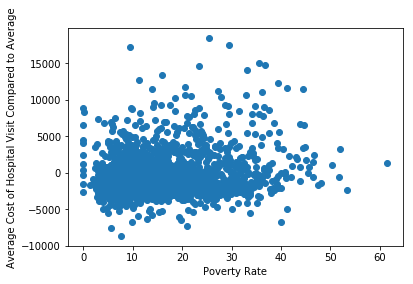

In [10]:
plt.scatter(summary_df["Pvty Rate"], summary_df["Difference"])
plt.xlabel("Poverty Rate")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")

plt.show

<function matplotlib.pyplot.show>

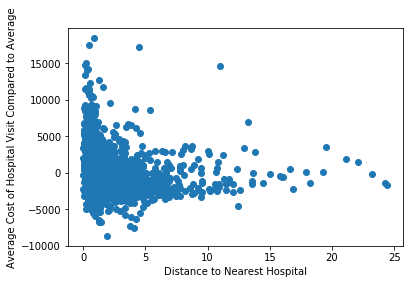

In [11]:
plt.scatter(summary_df["Hosp_Dist"], summary_df["Difference"])
plt.xlabel("Distance to Nearest Hospital")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")

plt.show

In [12]:
stdev = summary_df["Household Income"].describe()["std"]
print(stdev)
mean = summary_df["Household Income"].describe()["mean"]
print(mean)

21084.204784563655
51585.16754176611


In [13]:
alldata_df = pd.read_csv("zip_cost_plus_demographics.csv")
alldata_df.head()

,Unnamed: 0,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,State,Urban Type,Center Point Lat,Center Point Lng,...,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,ID,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,0,10003,72.719626,16867.592710,11566.621963,5300.970748,NY,Urbanized Area,40.731829,-73.989181,...,8.593641,3.890601,White,70.354523,3.0,NEW YORK EYE AND EAR INFIRMARY,10003,40.731853,-73.984483,0.246590
1,1,10016,50.691176,20250.382426,11320.090221,8930.292206,NY,Urbanized Area,40.745221,-73.978294,...,9.600916,3.447799,White,61.209379,2.0,NYU HOSPITALS CENTER,10016,40.742047,-73.973929,0.316923
2,2,10019,43.461538,17563.180096,11485.672404,6077.507692,NY,Urbanized Area,40.765823,-73.987179,...,11.959825,3.906773,White,57.364341,2.0,THE ADDICTION INSTITUTE OF NEW YORK,10019,40.769412,-73.986808,0.248422
3,3,10021,108.977169,19834.264749,12282.212100,7552.052648,NY,Urbanized Area,40.769225,-73.958741,...,6.350263,1.803869,White,87.387062,6.0,GRACIE SQUARE HOSPITAL,10021,40.769717,-73.953021,0.301969
4,4,10029,72.064000,19553.343280,11457.785120,8095.558160,NY,Urbanized Area,40.791763,-73.943970,...,29.527703,5.703398,His,58.185548,1.0,METROPOLITAN HOSPITAL CENTER,10029,40.784927,-73.944530,0.472624


In [14]:
radius=[]
radius = (alldata_df["Hosp_Dist"])+1
intrad = radius.astype(int).tolist()
intrad
#radius

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 6,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 3,
 5,
 4,
 2,
 1,
 1,
 5,
 3,
 4,
 3,
 2,
 2,
 4,
 1,
 3,
 1,
 8,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 4,
 5,
 1,
 2,
 4,
 2,
 1,
 4,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 4,
 3,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 4,
 4,
 2,
 4,
 3,
 2,
 2,
 3,
 4,
 3,
 5,
 3,
 4,
 2,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 4,
 2,
 6,
 3,
 4,
 4,
 3,
 2,
 1,
 3,
 3,
 4,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 4,
 9,
 11,
 3,
 2,
 1,
 4,
 5,
 3,
 2,
 3,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 3,
 1,
 2,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,

In [16]:
import gmaps.datasets
gmaps.configure(gkey) # Your Google API key

alldata_df_new = alldata_df[['Center Point Lat', 'Center Point Lng']]
summary_layer = gmaps.symbol_layer(
    alldata_df_new, fill_color="green", fill_opacity=0.5, stroke_color="green", stroke_opacity=0.5, scale=intrad
)
fig = gmaps.figure()
fig.add_layer(summary_layer)
fig

Figure(layout=FigureLayout(height='420px'))